In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/krish/OneDrive/Desktop/Coginitive Oncology Detection'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:/Users/krish/OneDrive/Desktop/Coginitive Oncology Detection\Untitled.ipynb
C:/Users/krish/OneDrive/Desktop/Coginitive Oncology Detection\.ipynb_checkpoints\Untitled-checkpoint.ipynb
C:/Users/krish/OneDrive/Desktop/Coginitive Oncology Detection\Testing\glioma_tumor\image(1).jpg
C:/Users/krish/OneDrive/Desktop/Coginitive Oncology Detection\Testing\glioma_tumor\image(10).jpg
C:/Users/krish/OneDrive/Desktop/Coginitive Oncology Detection\Testing\glioma_tumor\image(100).jpg
C:/Users/krish/OneDrive/Desktop/Coginitive Oncology Detection\Testing\glioma_tumor\image(11).jpg
C:/Users/krish/OneDrive/Desktop/Coginitive Oncology Detection\Testing\glioma_tumor\image(12).jpg
C:/Users/krish/OneDrive/Desktop/Coginitive Oncology Detection\Testing\glioma_tumor\image(13).jpg
C:/Users/krish/OneDrive/Desktop/Coginitive Oncology Detection\Testing\glioma_tumor\image(14).jpg
C:/Users/krish/OneDrive/Desktop/Coginitive Oncology Detection\Testing\glioma_tumor\image(15).jpg
C:/Users/krish/OneDrive/Desktop/Coginiti

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [5]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

Folder Paths

In [7]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('C:/Users/krish/OneDrive/Desktop/Coginitive Oncology Detection/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('C:/Users/krish/OneDrive/Desktop/Coginitive Oncology Detection/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [8]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

Train test split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [10]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Initialize the Sequential model
model = Sequential()

# Add the Input layer
model.add(Input(shape=(150, 150, 3)))  # Input shape for the model

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

# Add the fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

# Add the output layer
model.add(Dense(4, activation='softmax'))


In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 85s 976ms/step - accuracy: 0.2803 - loss: 3.2324 - val_accuracy: 0.2891 - val_loss: 1.3677
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 76s 917ms/step - accuracy: 0.2895 - loss: 1.3471 - val_accuracy: 0.2891 - val_loss: 1.4152
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 76s 914ms/step - accuracy: 0.3848 - loss: 1.2559 - val_accuracy: 0.4524 - val_loss: 1.3114
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 78s 936ms/step - accuracy: 0.5620 - loss: 1.0290 - val_accuracy: 0.5170 - val_loss: 1.1781
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 80s 965ms/step - accuracy: 0.6020 - loss: 0.9520 - val_accuracy: 0.5850 - val_loss: 1.0083
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 83s 999ms/step - accuracy: 0.6494 - loss: 0.8439 - val_accuracy: 0.5578 - val_loss: 1.0217
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.6697 - loss: 0.7769 - val_accuracy: 0.5068 - val_loss: 1.1964
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.7118 - loss: 0.6939 - val_accuracy: 

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

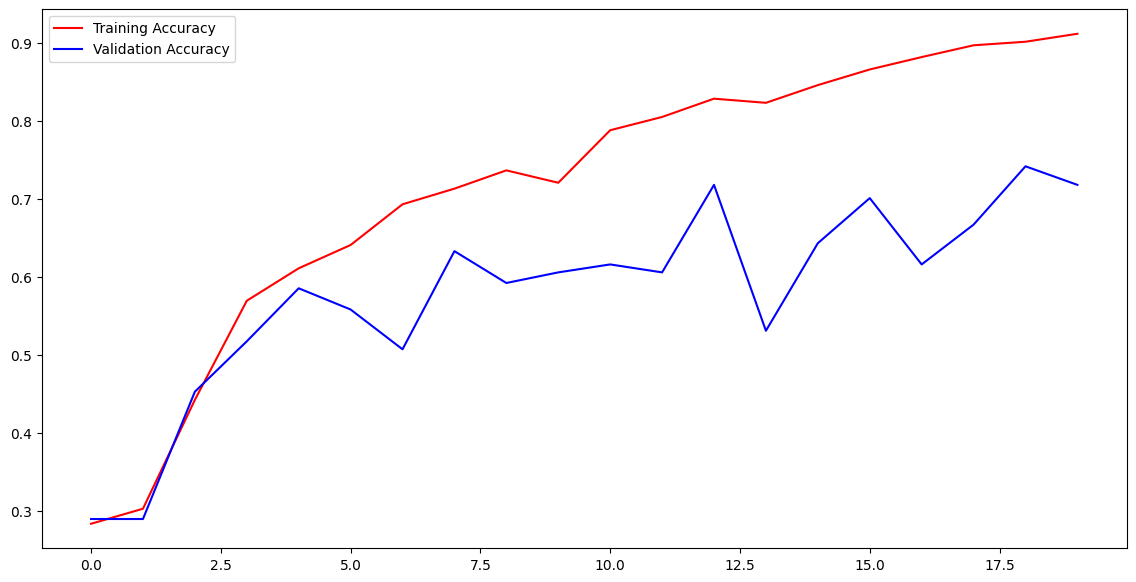

In [17]:
#model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

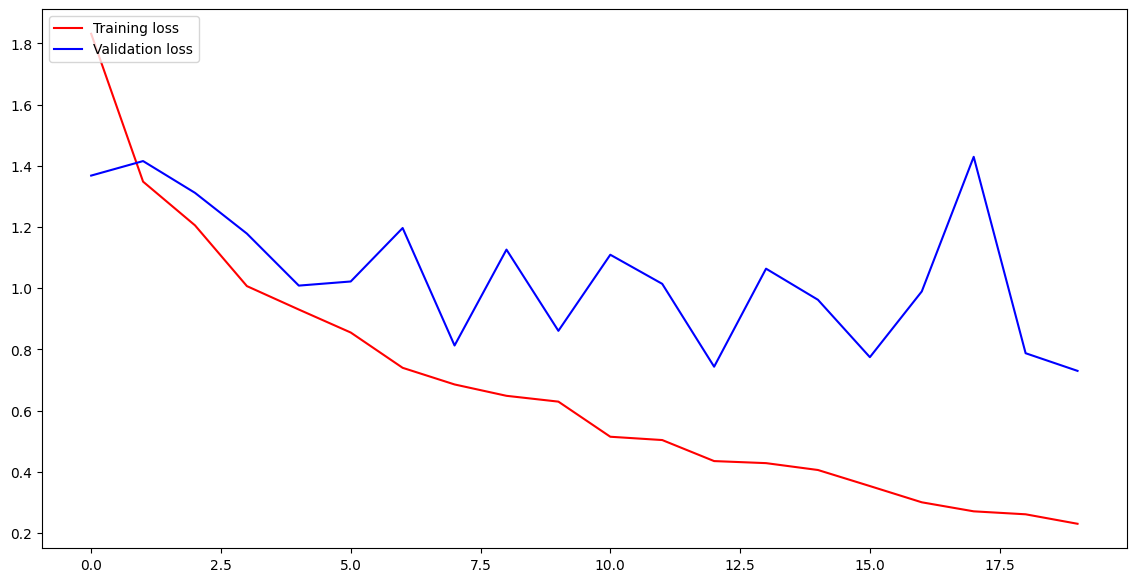

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Prediction

In [19]:
img = cv2.imread('C:/Users/krish/OneDrive/Desktop/Coginitive Oncology Detection/Testing/meningioma_tumor/image(11).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [20]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

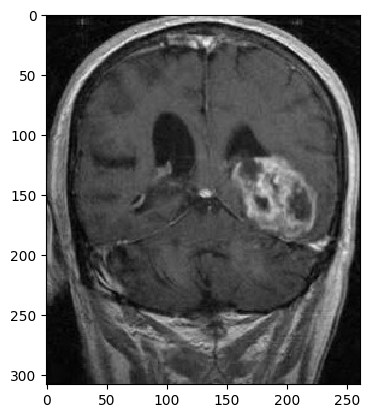

In [21]:
from tensorflow.keras.preprocessing import image
img = image.load_img('C:/Users/krish/OneDrive/Desktop/Coginitive Oncology Detection/Testing/meningioma_tumor/image(11).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [25]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


np.int64(2)

In [23]:
model.save('braintumor.h5')

In [24]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(Y_train), y=Y_train)
class_weights_dict = dict(enumerate(class_weights))
model.fit(X_train, y_train, epochs=20, validation_split=0.1, class_weight=class_weights_dict)


Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.9274 - loss: 0.2207 - val_accuracy: 0.7483 - val_loss: 1.1007
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.9224 - loss: 0.1771 - val_accuracy: 0.7143 - val_loss: 1.2321
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.9305 - loss: 0.1746 - val_accuracy: 0.4966 - val_loss: 1.7078
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.8994 - loss: 0.2899 - val_accuracy: 0.8571 - val_loss: 0.4740
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.9332 - loss: 0.1728 - val_accuracy: 0.7449 - val_loss: 0.8345
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.9476 - loss: 0.1402 - val_accuracy: 0.6905 - val_loss: 1.1360
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.9571 - loss: 0.1152 - val_accuracy: 0.8367 - val_loss: 0.4764
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.9504 - loss: 0.1387 - val_accuracy: 0.8333 - val_loss

In [26]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


np.int64(2)

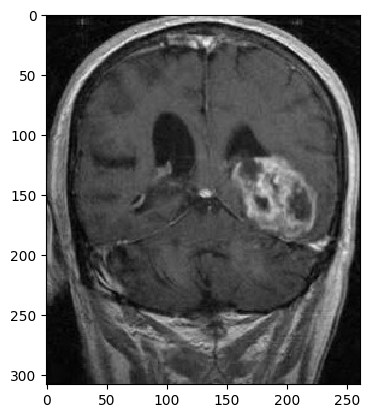

In [27]:
from tensorflow.keras.preprocessing import image
img = image.load_img('C:/Users/krish/OneDrive/Desktop/Coginitive Oncology Detection/Testing/meningioma_tumor/image(11).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [28]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


np.int64(2)

In [29]:
print(labels)
print(y_train[:10])  # Check if the encoded labels match the expected classes.


['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [30]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [32]:
prediction = model.predict(img_array)
predicted_label = labels[np.argmax(prediction)]
print(predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
no_tumor


In [33]:
print(X_train.shape)  # Check the dataset size.
print(Y_train[:10])   # Check labels.


(2937, 150, 150, 3)
['no_tumor' 'pituitary_tumor' 'no_tumor' 'meningioma_tumor' 'glioma_tumor'
 'pituitary_tumor' 'glioma_tumor' 'glioma_tumor' 'glioma_tumor'
 'pituitary_tumor']


In [34]:
from collections import Counter
print(Counter(Y_train))  # Verify label distribution.


Counter({np.str_('meningioma_tumor'): 937, np.str_('glioma_tumor'): 926, np.str_('pituitary_tumor'): 901, np.str_('no_tumor'): 500})


In [35]:
for label in labels:
    test_img = cv2.imread(f"C:/Users/krish/OneDrive/Desktop/Coginitive Oncology Detection/Testing/{label}/image(1).jpg")
    test_img = cv2.resize(test_img, (150, 150)) / 255.0
    test_img = test_img.reshape(1, 150, 150, 3)
    prediction = model.predict(test_img)
    predicted_label = labels[np.argmax(prediction)]
    print(f"Actual: {label}, Predicted: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Actual: glioma_tumor, Predicted: no_tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Actual: meningioma_tumor, Predicted: no_tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Actual: no_tumor, Predicted: no_tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Actual: pituitary_tumor, Predicted: no_tumor
